In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob

In [34]:
import glob
path = '../data/jpg/global_F814W_InvertY/'
files_name = glob.glob(os.path.join(path, "*"))

In [35]:
files_name

['../data/jpg/global_F814W_InvertY\\hst_10190_12_acs_wfc_f814w_j90o12_drc.jpg',
 '../data/jpg/global_F814W_InvertY\\hst_10190_28_acs_wfc_f814w_j90o28_drc.jpg',
 '../data/jpg/global_F814W_InvertY\\hst_14610_02_acs_wfc_f814w_jdb602_drc.jpg',
 '../data/jpg/global_F814W_InvertY\\hst_14610_12_acs_wfc_f814w_jdb612_drc.jpg',
 '../data/jpg/global_F814W_InvertY\\hst_14610_18_acs_wfc_f814w_jdb618_drc.jpg',
 '../data/jpg/global_F814W_InvertY\\hst_14610_23_acs_wfc_f814w_jdb623_drc.jpg',
 '../data/jpg/global_F814W_InvertY\\hst_14610_27_acs_wfc_f814w_jdb627_drc.jpg',
 '../data/jpg/global_F814W_InvertY\\hst_14610_30_acs_wfc_f814w_jdb630_drc.jpg',
 '../data/jpg/global_F814W_InvertY\\hst_14610_50_acs_wfc_f814w_jdb650_drc.jpg',
 '../data/jpg/global_F814W_InvertY\\hst_16274_54_acs_wfc_f814w_je9t54_drc.jpg']

In [5]:
# revers origin image coordinate is important, make sure that the origin is at the bottom left corner same as the DS9 coordinate
# ref by https://stackoverflow.com/questions/43584463/change-origin-of-image-coordinate-system-to-bottom-left-instead-of-default-top-l

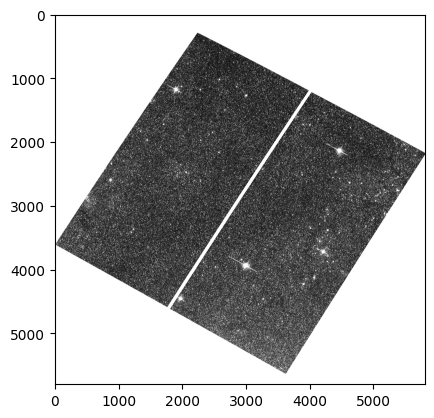

In [6]:
# reverse the origin of the y-axis of the image
def reverse_origin(image):
    plt.imshow(image, origin='lower')
    plt.show()
    

# display the image
def display_image(image):
    plt.imshow(image)
    plt.show()
image = plt.imread(files_name[0])
display_image((image))

In [7]:
# display image in file_
index = 1
img = plt.imread(files_name[index])


In [33]:
# read text in position file
path_ = "../data/jpg/labels_global_F814W_InvertY/"
file_ = glob.glob(os.path.join(path_, "*"))
with open(file_[index], "r") as f:
    items_list = f.readlines()
    items_list = [item.strip().split(" ") for item in items_list]


In [9]:
len(items_list), items_list

(8,
 [['Cluster', '4345.1594', '3210.6727', '100', '100'],
  ['Cluster', '4053.3451', '3980.5933', '100', '100'],
  ['Unknown', '3749.5921', '432.52298', '100', '100'],
  ['Cluster', '3563.3774', '2254.4871', '100', '100'],
  ['Unknown', '3212.5738', '560.43218', '100', '100'],
  ['Unknown', '2949.1477', '1564.4029', '100', '100'],
  ['Unknown', '2448.3617', '2044.3744', '100', '100'],
  ['Unknown', '1268.68', '1374.4495', '100', '100']])

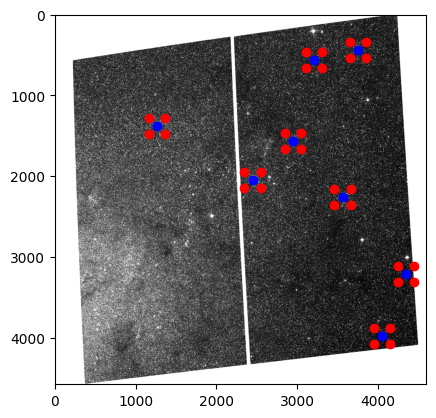

In [10]:
# plot scatter in image using position file by x_min = x-w, x_max = x+w, y_min = y-h, y_max = y+h
def plot_scatter(items_list, img):
    """
    items_list: list of items in position file
    img: image
    """
    for item in items_list:
        x = float(item[1])
        y = float(item[2])
        w = float(item[3])
        h = float(item[4])
        x_min = x - w
        x_max = x + w
        y_min = y - h
        y_max = y + h
        plt.scatter(x_min, y_min, c='r')
        plt.scatter(x_max, y_max, c='r')
        plt.scatter(x_min, y_max, c='r')
        plt.scatter(x_max, y_min, c='r')
        plt.scatter(x, y, c='b')
    plt.imshow(img)
    plt.show()

plot_scatter(items_list, img)

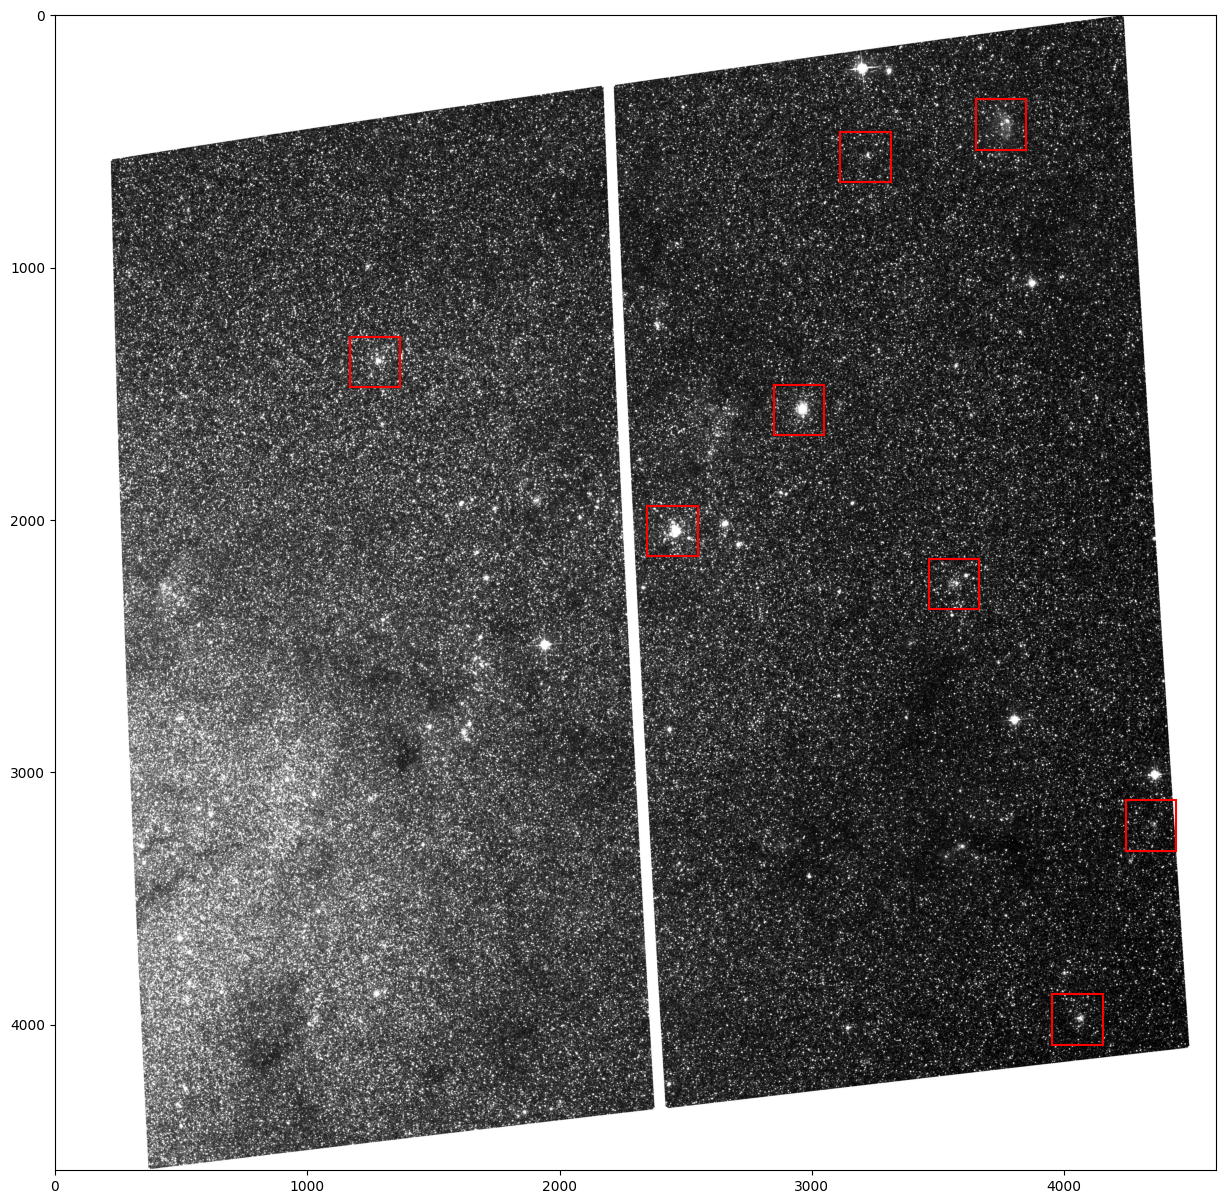

In [11]:
# display bounding box by using position file x_min = x-h, x_max = x+h, y_min = y-w, y_max = y+w
def plot_bounding_box(items_list, img):
    """
    items_list: list of items in position file
    img: image
    """
    plt.rcParams['figure.figsize'] = [15, 15]
    for item in items_list:
        x = float(item[1])
        y = float(item[2])
        w = float(item[3])
        h = float(item[4])
        x_min = x - w
        x_max = x + w
        y_min = y - h
        y_max = y + h
        plt.plot([x_min, x_max], [y_min, y_min], c='r')
        plt.plot([x_min, x_max], [y_max, y_max], c='r')
        plt.plot([x_min, x_min], [y_min, y_max], c='r')
        plt.plot([x_max, x_max], [y_min, y_max], c='r')
    plt.imshow(img)
    plt.show()

plot_bounding_box(items_list, img)

# do it with loop

In [57]:
# convert position file to YOLO format follow this format: class x_center y_center width height then save as a new files
# This function processed the class labels, when focus on one class, the class as a Cluster label will be 0, otherwise, the class label will be 1
def convert_position_to_YOLO_format(items_list, img, name_to_write , path):
    """
    items_list: list of items in position file
    img: image
    """
    height, width, _ = img.shape
    for item in items_list:
        x = float(item[1])
        y = float(item[2])
        w = float(item[3])
        h = float(item[4])
        x_center = x/width
        y_center = y/height
        width = w/width
        height = h/height
        # open file to write in Yolo_labels_global_F814W_InvertY by file_
        with open(path + name_to_write, "a") as f:
            if item[0] == "Cluster":
                f.write("0 {} {} {} {}\n".format(x_center, y_center, width, height))
            else:
                f.write("1 {} {} {} {}\n".format(x_center, y_center, width, height))
        f.close()

In [58]:
# loop for saving all files as a new file in path ../data/jpg/Yolo_labels_global_F814W_InvertY/
for index in range(len(files_name)):
    img_name = files_name[index].split("\\")[-1].split(".")[0]
    txt_name = file_[index].split("\\")[-1].split(".")[0]
    if img_name == txt_name:
        img = plt.imread(files_name[index])
        with open(file_[index], "r") as f:
            items_list = f.readlines()
            items_list = [item.strip().split(" ") for item in items_list]
            print("Processing file: ", txt_name)
            convert_position_to_YOLO_format(items_list, img, txt_name + ".txt", "../data/jpg/Yolo_labels_global_F814W_InvertY/")
    else:
        print("File name is not match, Example: ", img_name, txt_name)

Processing file:  hst_10190_12_acs_wfc_f814w_j90o12_drc
Processing file:  hst_10190_28_acs_wfc_f814w_j90o28_drc
Processing file:  hst_14610_02_acs_wfc_f814w_jdb602_drc
Processing file:  hst_14610_12_acs_wfc_f814w_jdb612_drc
Processing file:  hst_14610_18_acs_wfc_f814w_jdb618_drc
Processing file:  hst_14610_23_acs_wfc_f814w_jdb623_drc
Processing file:  hst_14610_27_acs_wfc_f814w_jdb627_drc
Processing file:  hst_14610_30_acs_wfc_f814w_jdb630_drc
Processing file:  hst_14610_50_acs_wfc_f814w_jdb650_drc
Processing file:  hst_16274_54_acs_wfc_f814w_je9t54_drc
